pituitary: (512, 512), dtype=uint8, mean=52.32, std=44.00
notumor: (225, 225), dtype=uint8, mean=48.29, std=43.28
glioma: (512, 512), dtype=uint8, mean=34.51, std=40.29
meningioma: (512, 512), dtype=uint8, mean=31.88, std=43.39


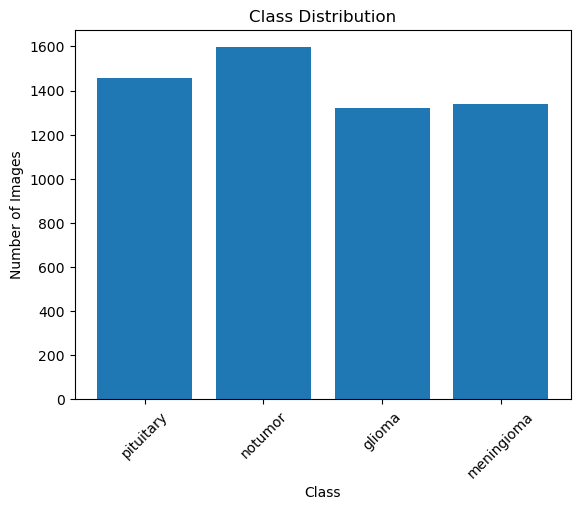

In [15]:
import os
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 

data_dir_training = '../data/Brain Cancer Dataset/Training'
classes = [d for d in os.listdir(data_dir_training)
            if os.path.isdir(os.path.join(data_dir_training, d))]
class_counts = {} 

for label in classes:
    folder = os.path.join(data_dir_training, label)
    images = os.listdir(folder)
    class_counts[label] = len(images)

    sample_img = cv2.imread(os.path.join(folder, images[4]), cv2.IMREAD_GRAYSCALE)
    print(f"{label}: {sample_img.shape}, dtype={sample_img.dtype}, mean={sample_img.mean():.2f}, std={sample_img.std():.2f}")

plt.bar(class_counts.keys(), class_counts.values())
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.xticks(rotation=45)
plt.show()

In [21]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

from data_pipeline import load_dataset

X, y, label_map = load_dataset('../data/Brain Cancer Dataset/Training', add_noise=True)

print("Shape:", X.shape)
print("Classes:", label_map)

Shape: (5712, 224, 224)
Classes: {'glioma': 1, 'meningioma': 2, 'notumor': 3, 'pituitary': 4}


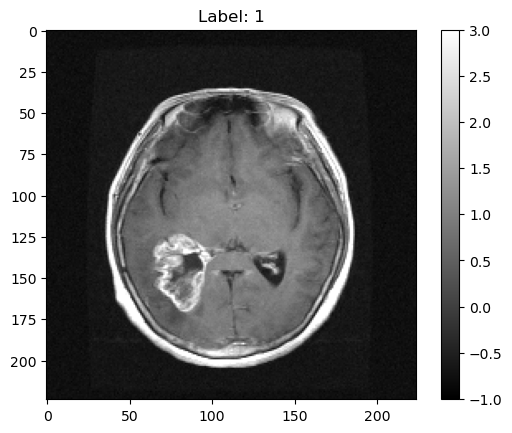

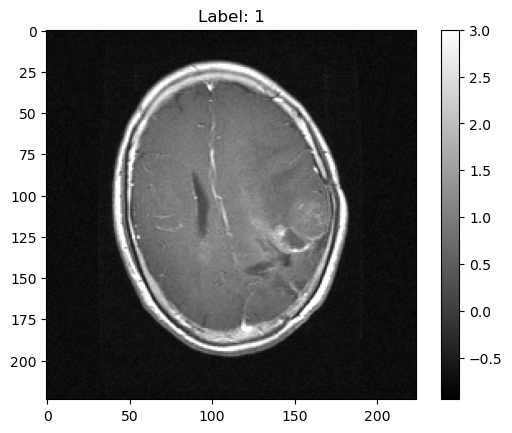

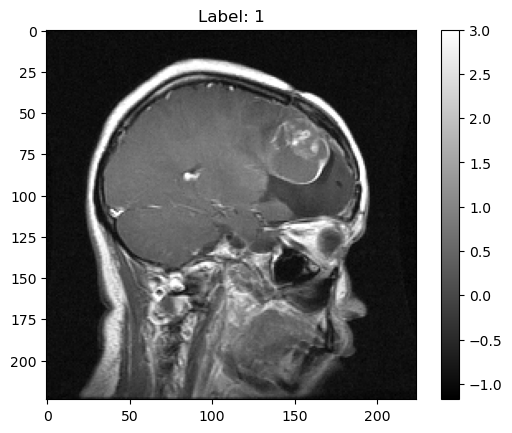

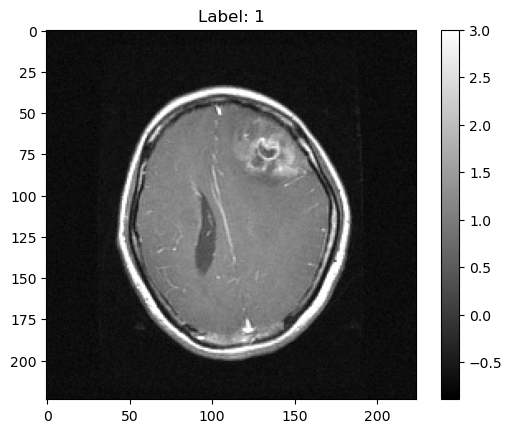

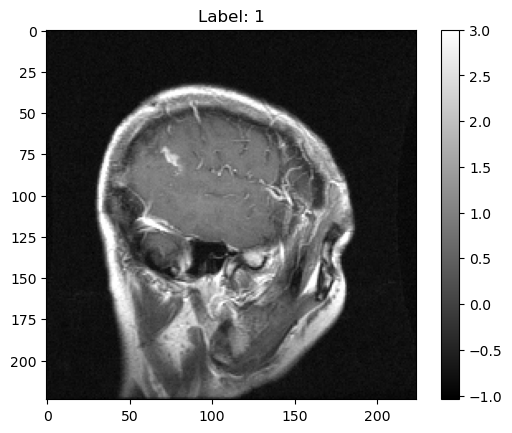

In [22]:
# plots for sanity check
for i in range(5): 
    plt.imshow(X[i], cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.colorbar()
    plt.show()

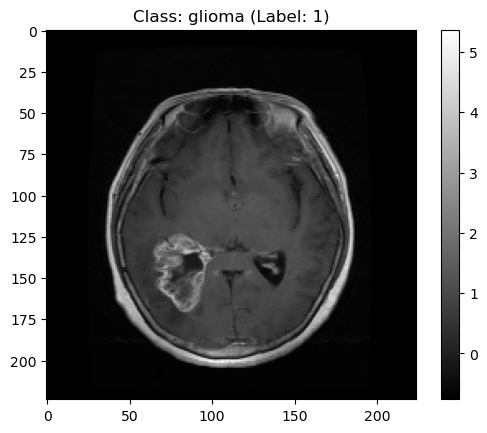

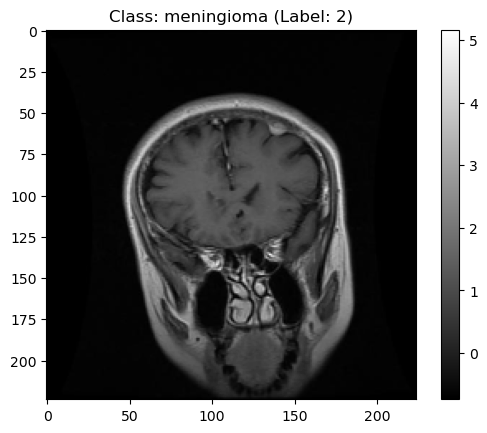

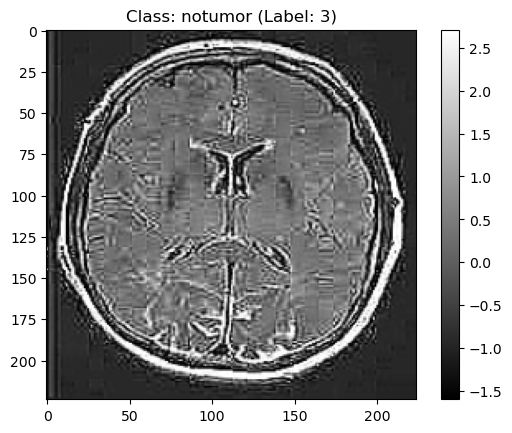

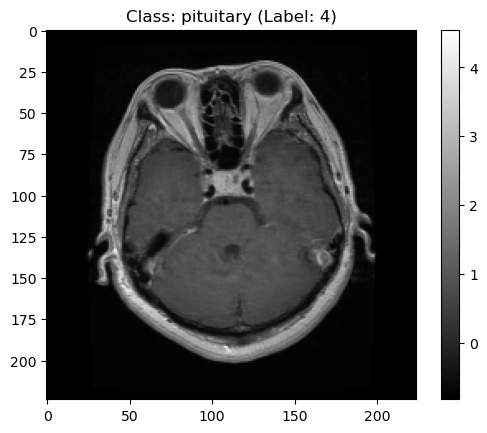

In [19]:
inverse_label_map = {v: k for k, v in label_map.items()}
shown = set()

for i in range(len(X)):
    label = y[i]
    if label not in shown:
        plt.imshow(X[i], cmap='gray')
        plt.title(f"Class: {inverse_label_map[label]} (Label: {label})")
        plt.colorbar()
        plt.show()
        shown.add(label)

    if len(shown) == len(label_map):
        break

In [20]:
from collections import Counter
print("Class distribution:", Counter(y))

Class distribution: Counter({3: 1595, 4: 1457, 2: 1339, 1: 1321})
